The MNIST (Modified National Institute of Standards and Technology) dataset consists of images of handwritten digits that is used for training and testing image processing systems

This is a multiclass classification problem in which the goal is to predict a single discrete label (0,1,2,3,4,5,6,7,8,9)

This notebook is used to generate a predictive model for the production system

In [1]:
import os

import matplotlib.pyplot as plt  # plotting
import numpy as np  # linear algebra
from skimage import io, transform, util
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist  # mnist dataset
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

Loading MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

Linear model definition

The output of the network is a layer of size 10 with a probability distribution over the 10 different classes

In [5]:
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation="softmax"))

Compiling the model

The chosen loss function is categorical_crossentropy because is a multiclass classification problem

In [6]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Encoding the data

In [7]:
train_images_prepared = train_images.reshape((60000, 28 * 28))
train_images_prepared = train_images_prepared.astype("float32") / 255

test_images_prepared = test_images.reshape((10000, 28 * 28))
test_images_prepared = test_images_prepared.astype("float32") / 255

In [8]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Setting a validation set of 6000 samples from 60000 training images

In [9]:
train_images_val = train_images_prepared[:6000]
train_images_partial = train_images_prepared[6000:]

train_labels_val = train_labels_one_hot[:6000]
train_labels_partial = train_labels_one_hot[6000:]

Training the model for 10 epochs or passes over the entire dataset

In [10]:
history = model.fit(
    train_images_partial,
    train_labels_partial,
    epochs=10,
    batch_size=128,
    validation_data=(train_images_val, train_labels_val),
)

Epoch 1/10


2024-03-31 21:18:56.862940: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8670 - loss: 0.4630 - val_accuracy: 0.9535 - val_loss: 0.1597
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1230 - val_accuracy: 0.9687 - val_loss: 0.1054
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0754 - val_accuracy: 0.9762 - val_loss: 0.0829
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 0.0531 - val_accuracy: 0.9810 - val_loss: 0.0675
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0384 - val_accuracy: 0.9807 - val_loss: 0.0637
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0285 - val_accuracy: 0.9803 - val_loss: 0.0656
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0220 - val_accuracy: 0.9805 - val_loss: 0.0666
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.0152 - val_accuracy: 0.9813 - val_

Plotting training and validation loss

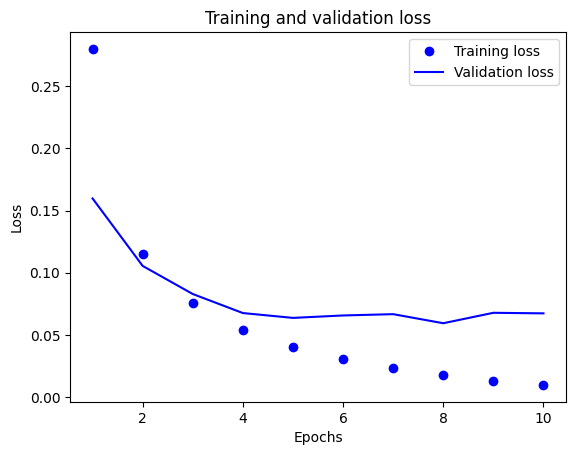

In [11]:
loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Plotting training and validation accuracy

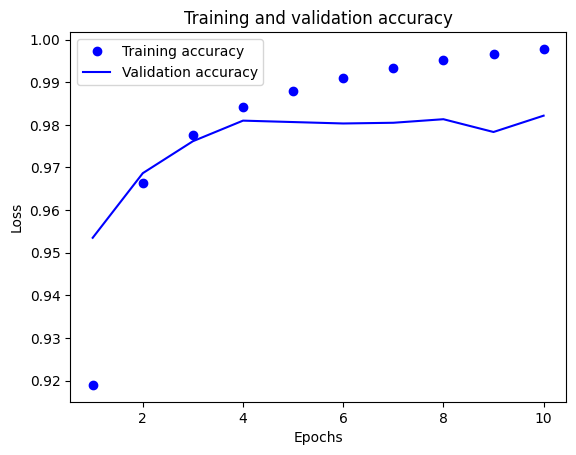

In [12]:
acc = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, validation_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Overfit begins after 5 epochs

Retraining the model from scratch for 5 epochs to avoid overfit. Note that validation set is not used for this time

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images_prepared, train_labels_one_hot, epochs=5, batch_size=128)

Epoch 1/5
  1/469 ━━━━━━━━━━━━━━━━━━━━ 1:26 186ms/step - accuracy: 0.0781 - loss: 2.4094

2024-03-31 21:19:29.842693: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.4504
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1192
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0717
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0498
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0373


Save MNIST model for production system

In [14]:
model.save("app/mnist_model.keras")
del model
model = load_model("app/mnist_model.keras")

Model evaluation

In [15]:
final_loss, final_acc = model.evaluate(test_images_prepared, test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.9745 - loss: 0.0776


Final results

In [16]:
print(f"Final loss: {final_loss}")
print(f"Final accuracy: {final_acc}")

Final loss: 0.06699982285499573
Final accuracy: 0.9779999852180481


Generating predictions for two samples of numbers 4 and 9 from test images

First sample is a number 4 from test images

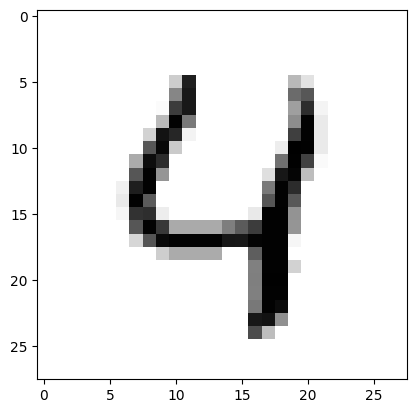

In [17]:
digit = test_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
test_labels[4]

4

In [19]:
prediction = model.predict(test_images_prepared[4:5], batch_size=784)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[5.1081292e-07 3.1363423e-09 2.1023111e-06 7.7408027e-09 9.9883264e-01
  4.4669033e-08 1.4959137e-05 2.1703441e-05 2.2524851e-07 1.1278475e-03]]


The highest likelihood is above 0.99 for number 4

Generate predictions for example image

In [20]:
APP_ROOT = os.path.dirname(os.path.abspath("Deep Learning MNIST prediction model with Keras.ipynb"))
APP_STATIC = os.path.join(APP_ROOT, "app/app/static")

filename = "4.jpg"
path_to_file = os.path.join(APP_STATIC, filename)
image = io.imread(path_to_file, as_gray=True)  # read as grayscale

In [21]:
def preprocess_image(image):
    # invert grayscale image
    image = util.invert(image)
    # resize image and prepare it for model
    image = transform.resize(image, (28, 28), anti_aliasing=True, mode="constant")
    image = np.array(image)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()
    image = image.reshape((1, 28 * 28))

    return image

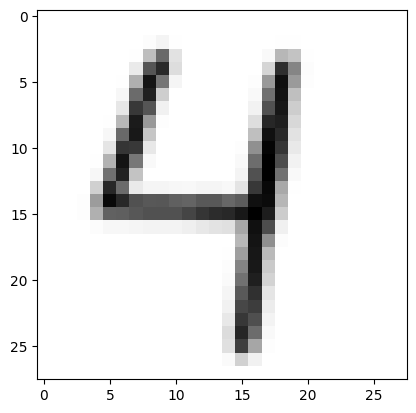

In [22]:
preprocessed_image = preprocess_image(image)

In [23]:
preds = model.predict(preprocessed_image)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[8.2700979e-08, 1.6669065e-04, 4.8218979e-05, 2.3290573e-05,
        9.9914443e-01, 1.4074722e-06, 2.4940262e-05, 4.9085240e-04,
        4.4384862e-05, 5.5692170e-05]], dtype=float32)

The highest likelihood is above 0.99 for number 4

In [24]:
np.argmax(preds)

4